# AdaGrad:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (np.sum(X, axis=1) > 1).astype(int).reshape(-1, 1)


In [3]:
# Define the neural network structure
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 50
epsilon = 1e-8

In [4]:

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [5]:
# Initialize AdaGrad variables
grad_squared_W1 = np.zeros_like(W1)
grad_squared_b1 = np.zeros_like(b1)
grad_squared_W2 = np.zeros_like(W2)
grad_squared_b2 = np.zeros_like(b2)


In [6]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [7]:
# Function to compute binary cross-entropy loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [8]:
# Training loop
training_loss = []
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward propagation
        Z1 = np.dot(X[i:i+1], W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        y_hat = sigmoid(Z2)

        # Compute loss
        loss = compute_loss(y[i:i+1], y_hat)

        # Backward propagation
        dZ2 = y_hat - y[i:i+1]
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = np.dot(X[i:i+1].T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update gradients squared
        grad_squared_W1 += dW1 ** 2
        grad_squared_b1 += db1 ** 2
        grad_squared_W2 += dW2 ** 2
        grad_squared_b2 += db2 ** 2

        # Update weights and biases using AdaGrad
        W1 -= learning_rate * dW1 / (np.sqrt(grad_squared_W1) + epsilon)
        b1 -= learning_rate * db1 / (np.sqrt(grad_squared_b1) + epsilon)
        W2 -= learning_rate * dW2 / (np.sqrt(grad_squared_W2) + epsilon)
        b2 -= learning_rate * db2 / (np.sqrt(grad_squared_b2) + epsilon)

    # Compute average loss for the epoch
    avg_loss = compute_loss(y, sigmoid(np.dot(sigmoid(np.dot(X, W1) + b1), W2) + b2))
    training_loss.append(avg_loss)


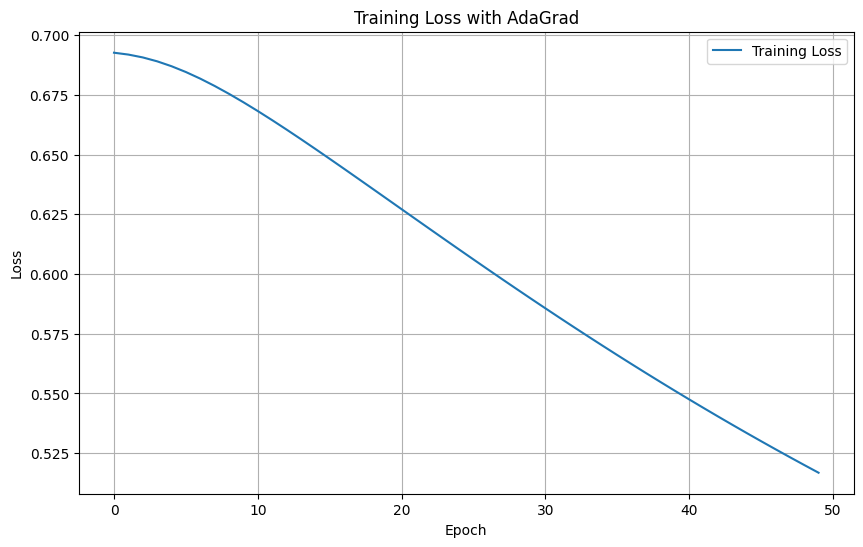

In [9]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with AdaGrad')
plt.legend()
plt.grid(True)
plt.show()